In [59]:
import pandas as pd
import numpy as np  # importing numpy for performing numeric array related operations
import matplotlib.pyplot as plt # importing matplotlib.pyplot for basic plotting operations
import seaborn as sns  # importing seaborn for advanced data visualization
# Below is the magic function to display and save graphs/figures in the output cells
%matplotlib inline   
from sklearn.model_selection import train_test_split # For train-test split
# For standardizing/normalizing the data (let's import many and see which suits the best)
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing import PolynomialFeatures # To create polynomial features
import warnings # Import warnings module
warnings.filterwarnings('ignore') # Ignore the warnings
from sklearn.feature_selection import f_regression,SelectKBest,mutual_info_regression,RFE # For feature selection
# Let's import the various supervised ML models
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.neighbors import KNeighborsRegressor # K-NN Regressor Model
from sklearn.svm import SVR # Support vector regressor
from sklearn.tree import DecisionTreeRegressor # Decision tree regressor
# Let's import the ensemble regressor models
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline # Import sklearn pipeline
from sklearn.model_selection import cross_val_score, KFold # Cross validation
from sklearn.metrics import explained_variance_score # Metric used to evaluate the regression models
from scipy.stats import zscore # zscore normalization from scipy.stats
from sklearn.utils import resample # Used to find the bootstrapping confidence interval

In [66]:
#Load Parkinson’s Disease data file
#concrete_data = pd.read_csv("concrete.csv")
df_orig = pd.read_csv('concrete.csv')
# Creating a copy of the original dataframe
concrete_data = df_orig.copy()

In [48]:
#Peek into the data
concrete_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


#### Observation

It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
All the records are numeric.

In [49]:
#Total number of rows and cols
concrete_data.shape

(1030, 9)

In [50]:
#number of points & numer of features
print('No. of features:', concrete_data.shape[1])
print('No. of Datapoints:', concrete_data.shape[0])

No. of features: 9
No. of Datapoints: 1030


In [51]:
#Display all the features in dataset
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [52]:
#displays the data type
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Observation
It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type.Also,there are no null values in the data.

In [53]:
#To check if any missing values are there in any variable
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [54]:
#display 5 point summary of dataframe
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Observation

It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
We can see that cement,slag,ash are left skewed

## Exploratory Data Analysis

### Univariate Analysis

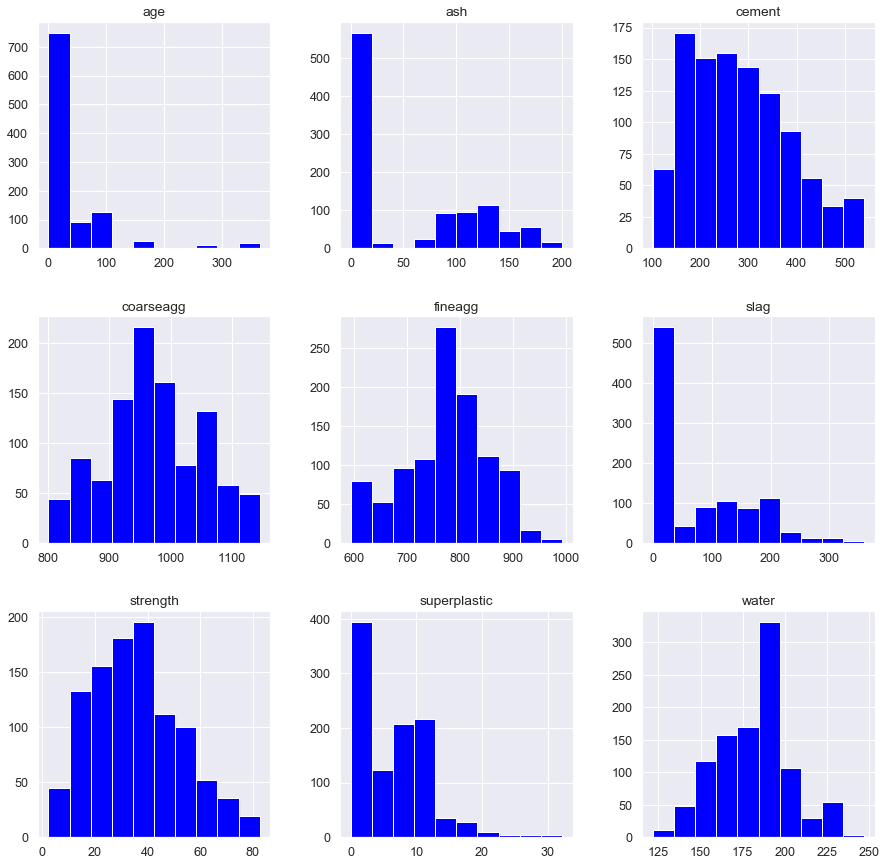

In [37]:
#Distribution of data

concrete_data.hist( figsize=(15,15), color='blue')
plt.show()

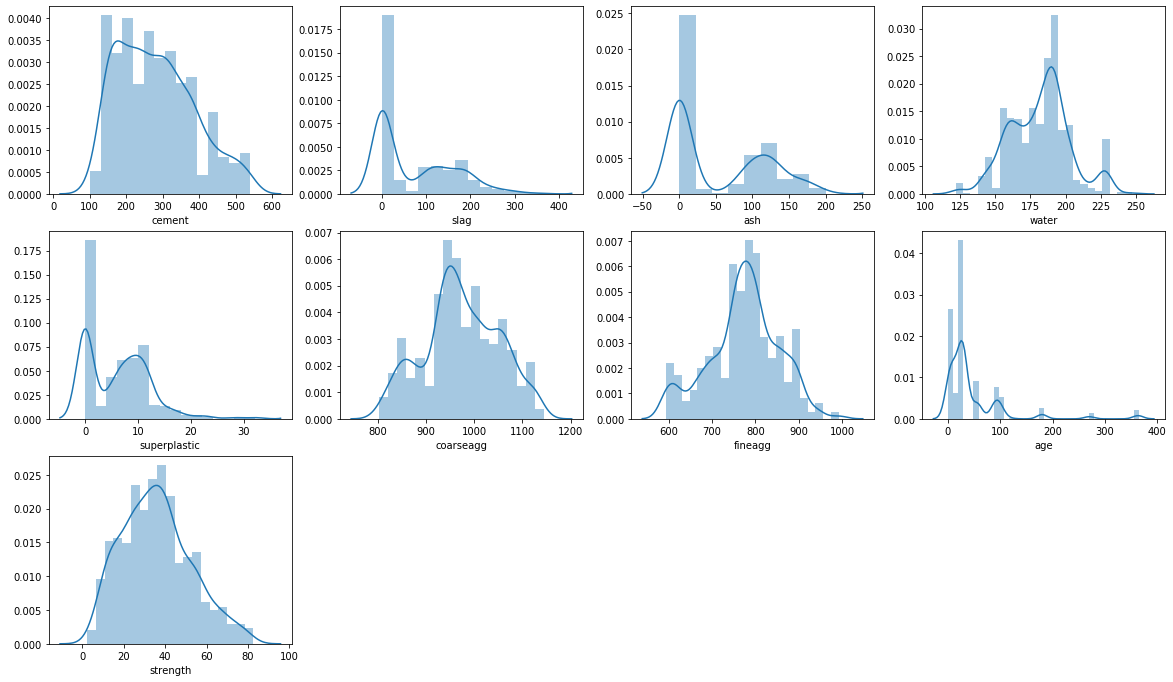

In [11]:
num_features=[col for col in concrete_data.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(5,4,i);
    sns.distplot(concrete_data[col])
plt.show()

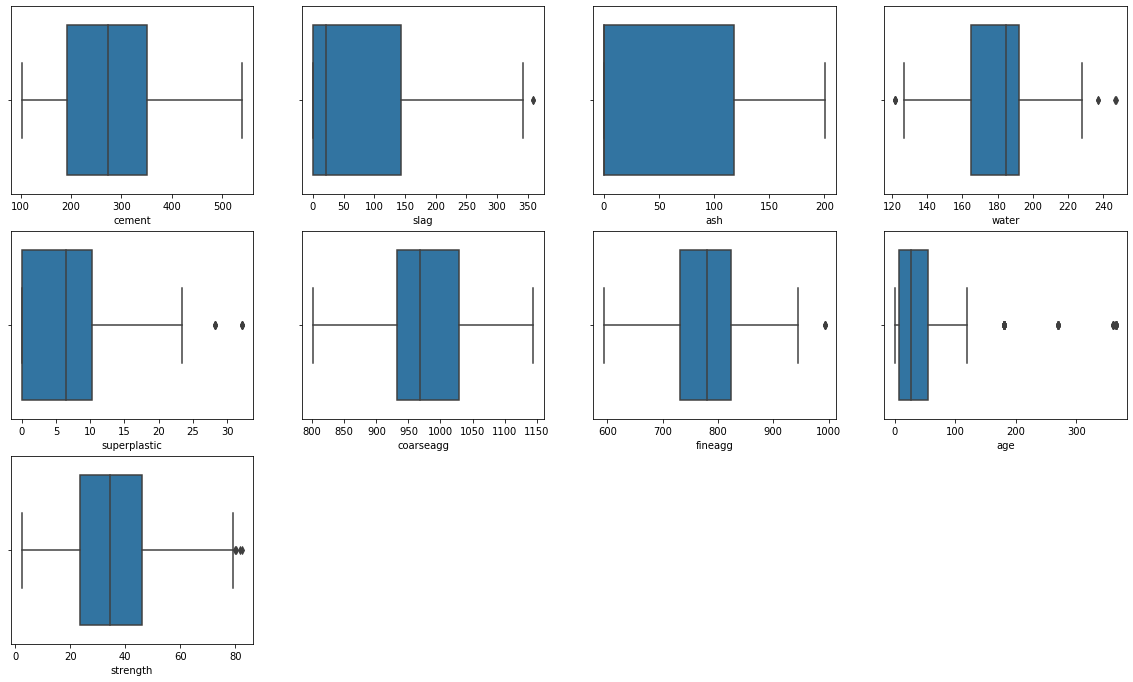

In [12]:
num_features=[col for col in concrete_data.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(5,4,i);
    sns.boxplot(concrete_data[col]);
plt.show()

### Multivariate Analysis

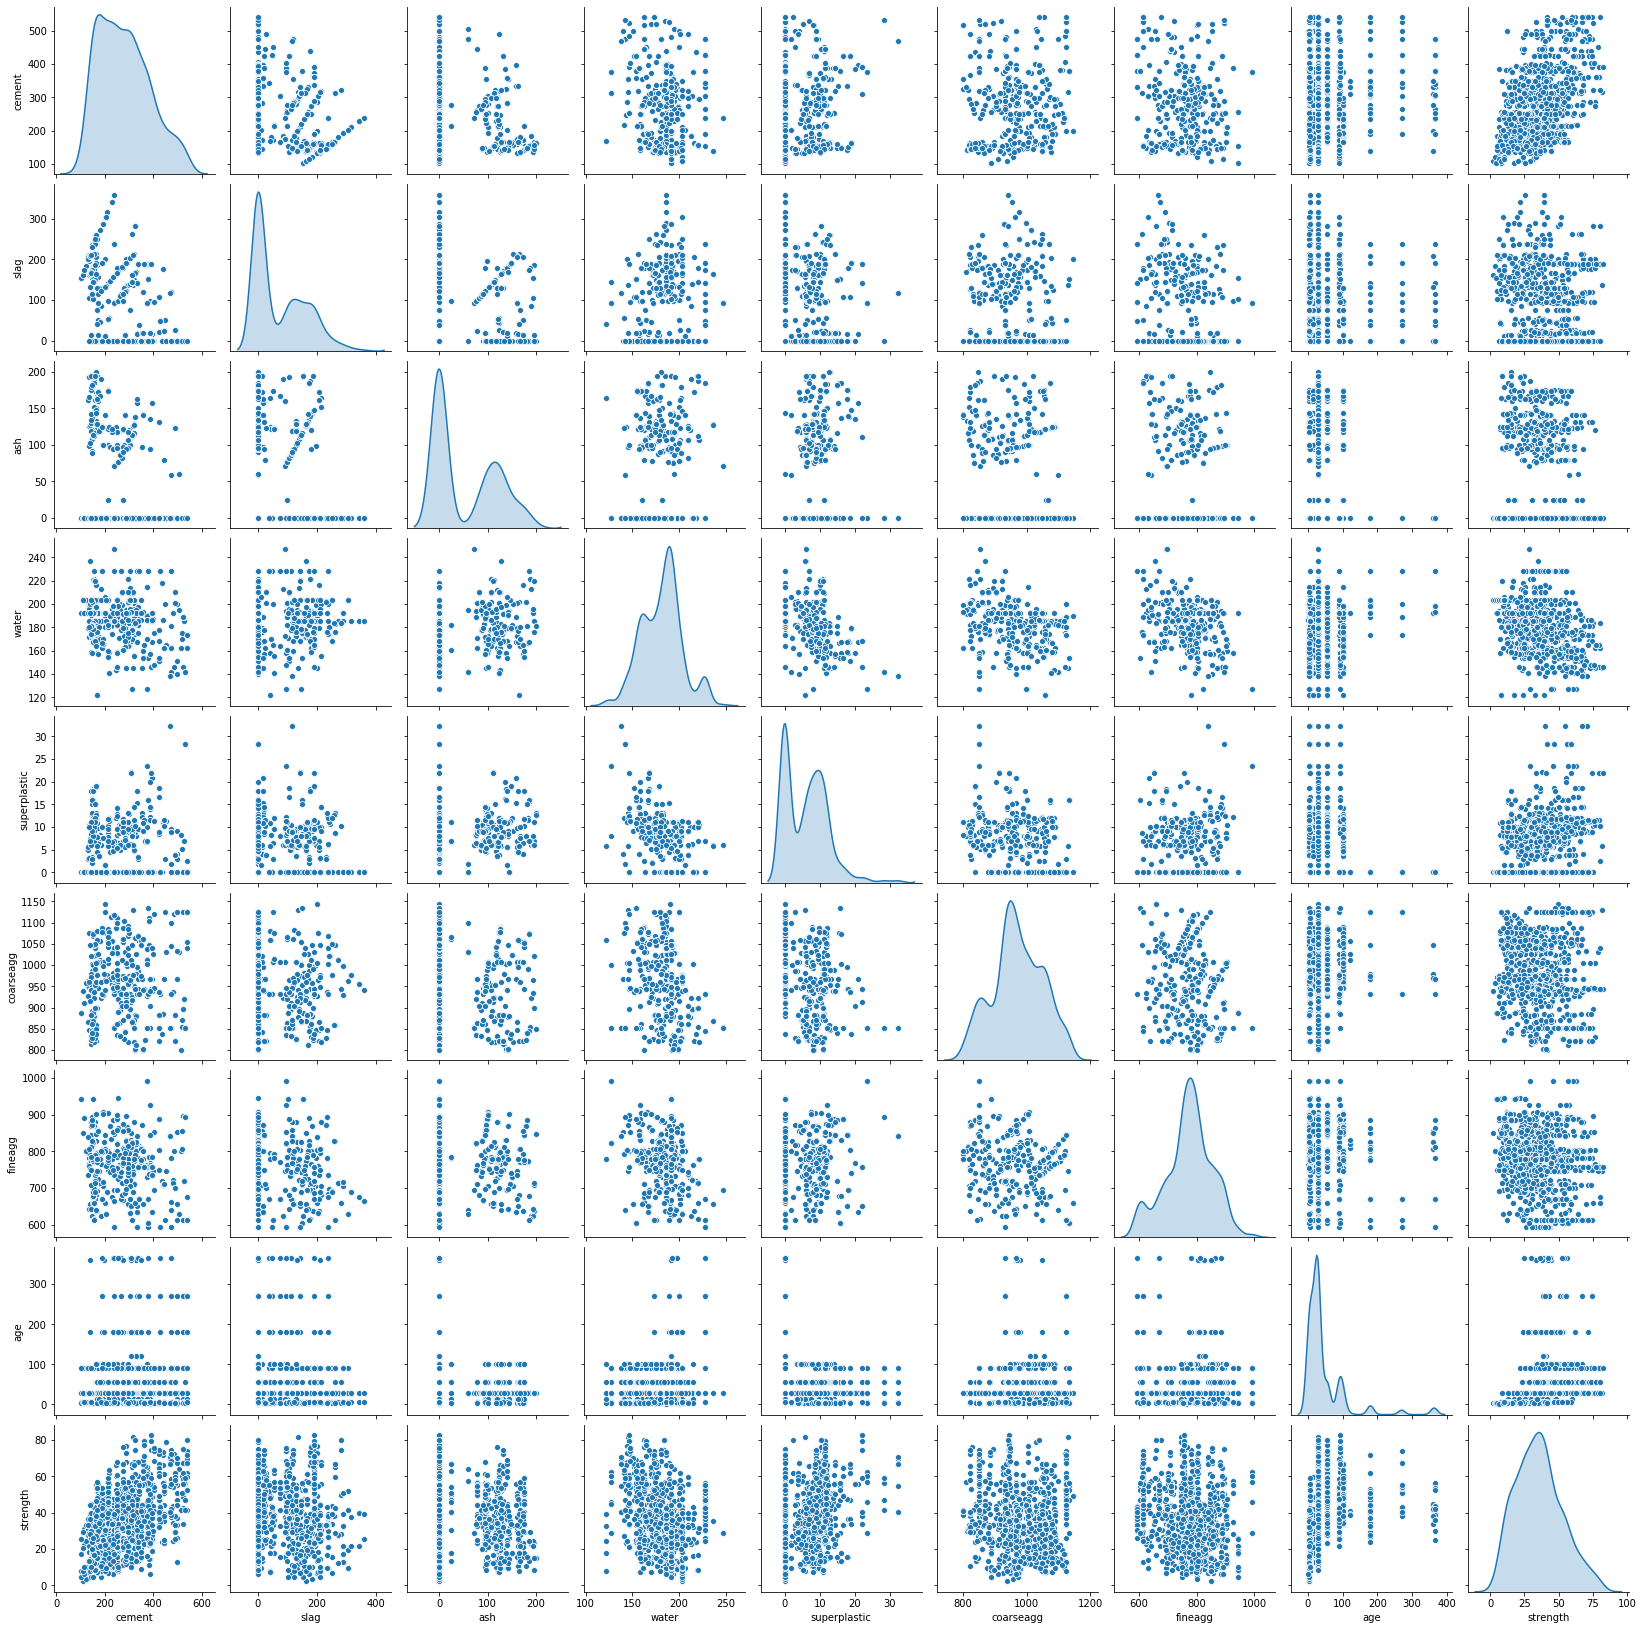

In [14]:
sns.pairplot(concrete_data,diag_kind='kde')
plt.show()

#### Observation
Diagonals Analysis The diagonal gives the same information, we got using distplot.

cement attribute have almost normal curve.
slag has two gausssians and rightly skewed.It shows the presence of outlies.
ash has two gaussians and rightly skewed.It shows the presence of outlies.
water has atleast guassians and slighly left skewed.It shows the presence of outlies.
superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
coarseagg has three guassians and almost normal.
fineagg has almost two guassians and looks like normal.
age has multiple guassians and rightly skewed. It shows the presence of outlies.
strength is close to a normal curve.
We not only have missing values problem but also outliers problem in the dataset.

Off Diagonal Analysis: Relationship between indpendent attributes

Scatter plots

cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

In [16]:
#Corelation Matrix of attributes 
cor = concrete_data.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


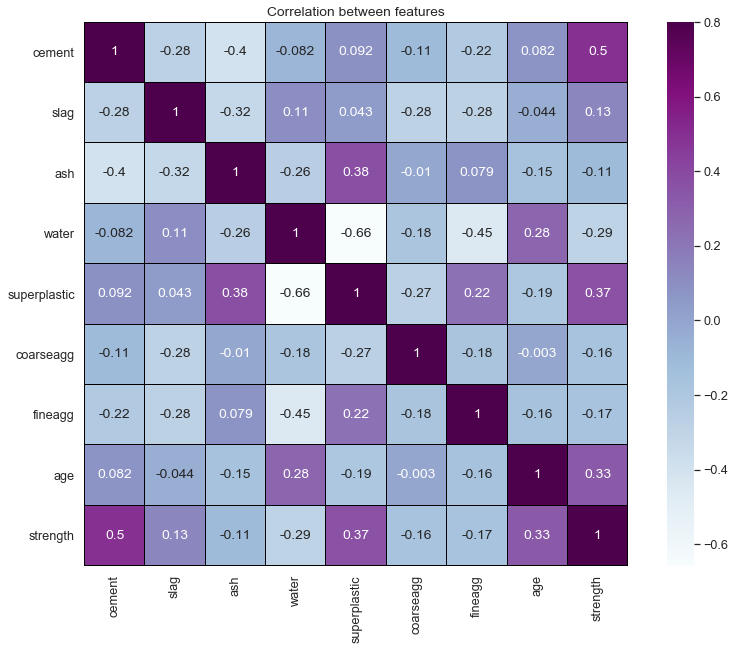

In [17]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

#### Observation 
It is also giving the same information we observed in pairplot analysis.
water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

In [38]:
#outliers
concrete_data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

### Replace outliers with median

In [39]:
def outliers_transform(base_dataset):
    num_features=[col for col in base_dataset.select_dtypes(np.number).columns ]
    print("Outliers in Dataset before Treatment")
    print("*********************************************")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
        
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[cols]=y
                
    print("\nOutliers in Dataset after Treatment")
    print("*********************************************")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")

In [45]:
outliers_transform(concrete_data)

Outliers in Dataset before Treatment
*********************************************
Column  cement 	 has  0  outliers
Column  slag 	 has  0  outliers
Column  ash 	 has  0  outliers
Column  water 	 has  0  outliers
Column  superplastic 	 has  0  outliers
Column  coarseagg 	 has  0  outliers
Column  fineagg 	 has  1  outliers
Column  age 	 has  0  outliers
Column  strength 	 has  0  outliers

Outliers in Dataset after Treatment
*********************************************
Column  cement 	 has  0  outliers
Column  slag 	 has  0  outliers
Column  ash 	 has  0  outliers
Column  water 	 has  0  outliers
Column  superplastic 	 has  0  outliers
Column  coarseagg 	 has  0  outliers
Column  fineagg 	 has  0  outliers
Column  age 	 has  0  outliers
Column  strength 	 has  0  outliers


### Feature Engineering, Model Building and Model Tuning

2.a. Identify opportunities (if any) to create a composite feature, drop a feature

2.b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

2.c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

2.a Identify opportunities (if any) to create a composite feature, drop a feature

In this problem, we do have an opportunity to add a composite feature which is highly useful to predict the concrete strength in MPa (Mega Pascal) namely water-cement ratio. (Ref: https://en.wikipedia.org/wiki/Water%E2%80%93cement_ratio )

There is a non-linear relationship between water-cement ratio and concrete strenth. Smaller values of water-cement ratio (W/C) are associated with higher values of concrete strength where as higher values of ratio provide small concrete strength.

In [56]:
# Let's add this new composite feature before target attribute.
concrete_data.insert(8,'water/cement',concrete_data['water']/concrete_data['cement'])
# Let's check whether the feature is added properly or not?
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [57]:
concrete_data.corr()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,-0.879130,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.357322,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,0.246004,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,0.332968,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,-0.223215,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.034255,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,0.066595,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,-0.029268,0.328873
water/cement,-0.879130,0.357322,0.246004,0.332968,-0.223215,-0.034255,0.066595,-0.029268,1.000000,-0.500692
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,-0.500692,1.000000


One can see that, the newly added feature is moderately correlated (negatively) with target attribute

Dropping a feature: We won't drop any feature for the time being, however after feature engineering stage, we may choose to drop some features to avoid overfitting

2.b Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and ingredients. Thus using a simple linear model won't help in this problem to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes

In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features with degree 3.

In [60]:
poly3 = PolynomialFeatures(degree = 3, interaction_only=True)
poly3_ft = poly3.fit_transform(concrete_data.drop('strength',axis=1))
df_poly3= pd.DataFrame(poly3_ft,columns=['feat_'+str(x) for x in range(poly3_ft.shape[1])])
df_poly3.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [62]:
# Let us create the dataframe with all features
df_feat = concrete_data.drop('strength',axis=1).join(df_poly3)
df_feat['strength'] = concrete_data['strength']
print(df_feat.shape)
df_feat.head()

(1030, 140)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


In [63]:
df_feat.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


### Observation
The newly created dataframe with features contains 139 independent and 1 target attribute. Since, all the features will not be useful, we apply LASSO regularization step and select the most relevant features. This will also reduce the problem of overfitting models.

In [64]:
from sklearn.linear_model import Lasso
X = df_feat.drop('strength',axis=1)
y = df_feat['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso() # Since it uses L1 reglarization features with zero coefficients will be insignificant.
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
# Let's us get the features selected by Lasso
lasso_feat = X_train.columns[lasso.coef_!=0].tolist() # Dropping the features with 0 coefficient value
print(lasso_feat) # Features selected using LASSO regularization
print("Out of total {} independent features, number of features selected by LASSO regularization are {} ".format(X_train.shape[1],len(lasso_feat)))
df_feat = df_feat[lasso_feat] # Select independent features 
df_feat.head()

Lasso model: [ 9.36261145e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.19963541e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.69605615e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.58792934e-03  0.00000000e+00 -0.00000000e+00 -1.73075281e-04
 -2.01176178e-04 -3.56299907e-04 -1.63375790e-03  9.30498802e-05
 -3.59018932e-05 -8.67637327e-05  0.00000000e+00 -4.09362681e-04
  3.02310618e-05  8.18782550e-03 -4.72770847e-05 -1.67582841e-06
  1.71028328e-03 -0.00000000e+00  3.35523632e-04  2.21381349e-03
 -1.30105722e-04  1.18305110e-04  1.31214308e-03  0.00000000e+00
  6.53187043e-03  1.06284484e-04  2.22576434e-04  4.62481310e-04
 -5.85797321e-03  3.40271161e-04 -1.13429938e-03  1.43450818e-02
 -0.00000000e+00  1.17361234e-05 -3.66178099e-05 -1.94916196e-02
  1.81028468e-05 -0.00000000e+00  0.00000000e+00 -1.61238696e-06
  1.46513458e-06 -3.42197516e-07 -5.97228982e-07  4.71200219e-07
 -2.38435007

,cement,fineagg,feat_1,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,748.5,141.3,748.5,29955.60,0.00,28754.55,0.00,137315.34,105763.05,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,796.2,168.9,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,134478.18,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,861.2,250.0,861.2,0.00,23925.00,46850.00,1375.00,239225.00,215300.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,670.0,266.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,178220.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,696.7,154.8,696.7,28390.32,0.00,29922.84,1408.68,162137.52,107849.16,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


2.c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [67]:
from sklearn.cluster import KMeans
df_z = df_orig.apply(zscore) # Get the normalized dataframe
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:14]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7586.181995
2,3,6368.781536
3,4,5534.857990
4,5,4812.629466
5,6,4352.177755
6,7,4085.792603
7,8,3790.680718
8,9,3603.169152
9,10,3412.136668


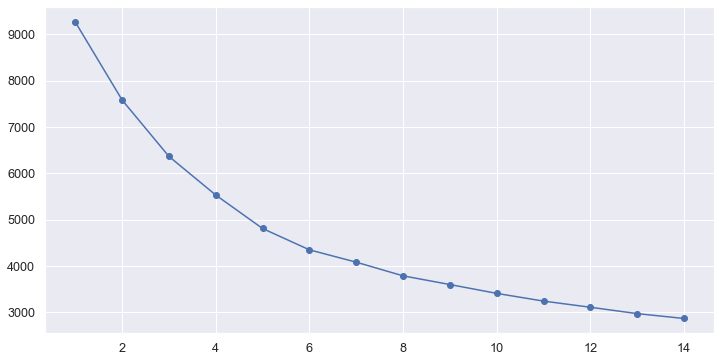

In [68]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [69]:
kmeans = KMeans(n_clusters= 7)
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 65 168 186  45 278 159 129]


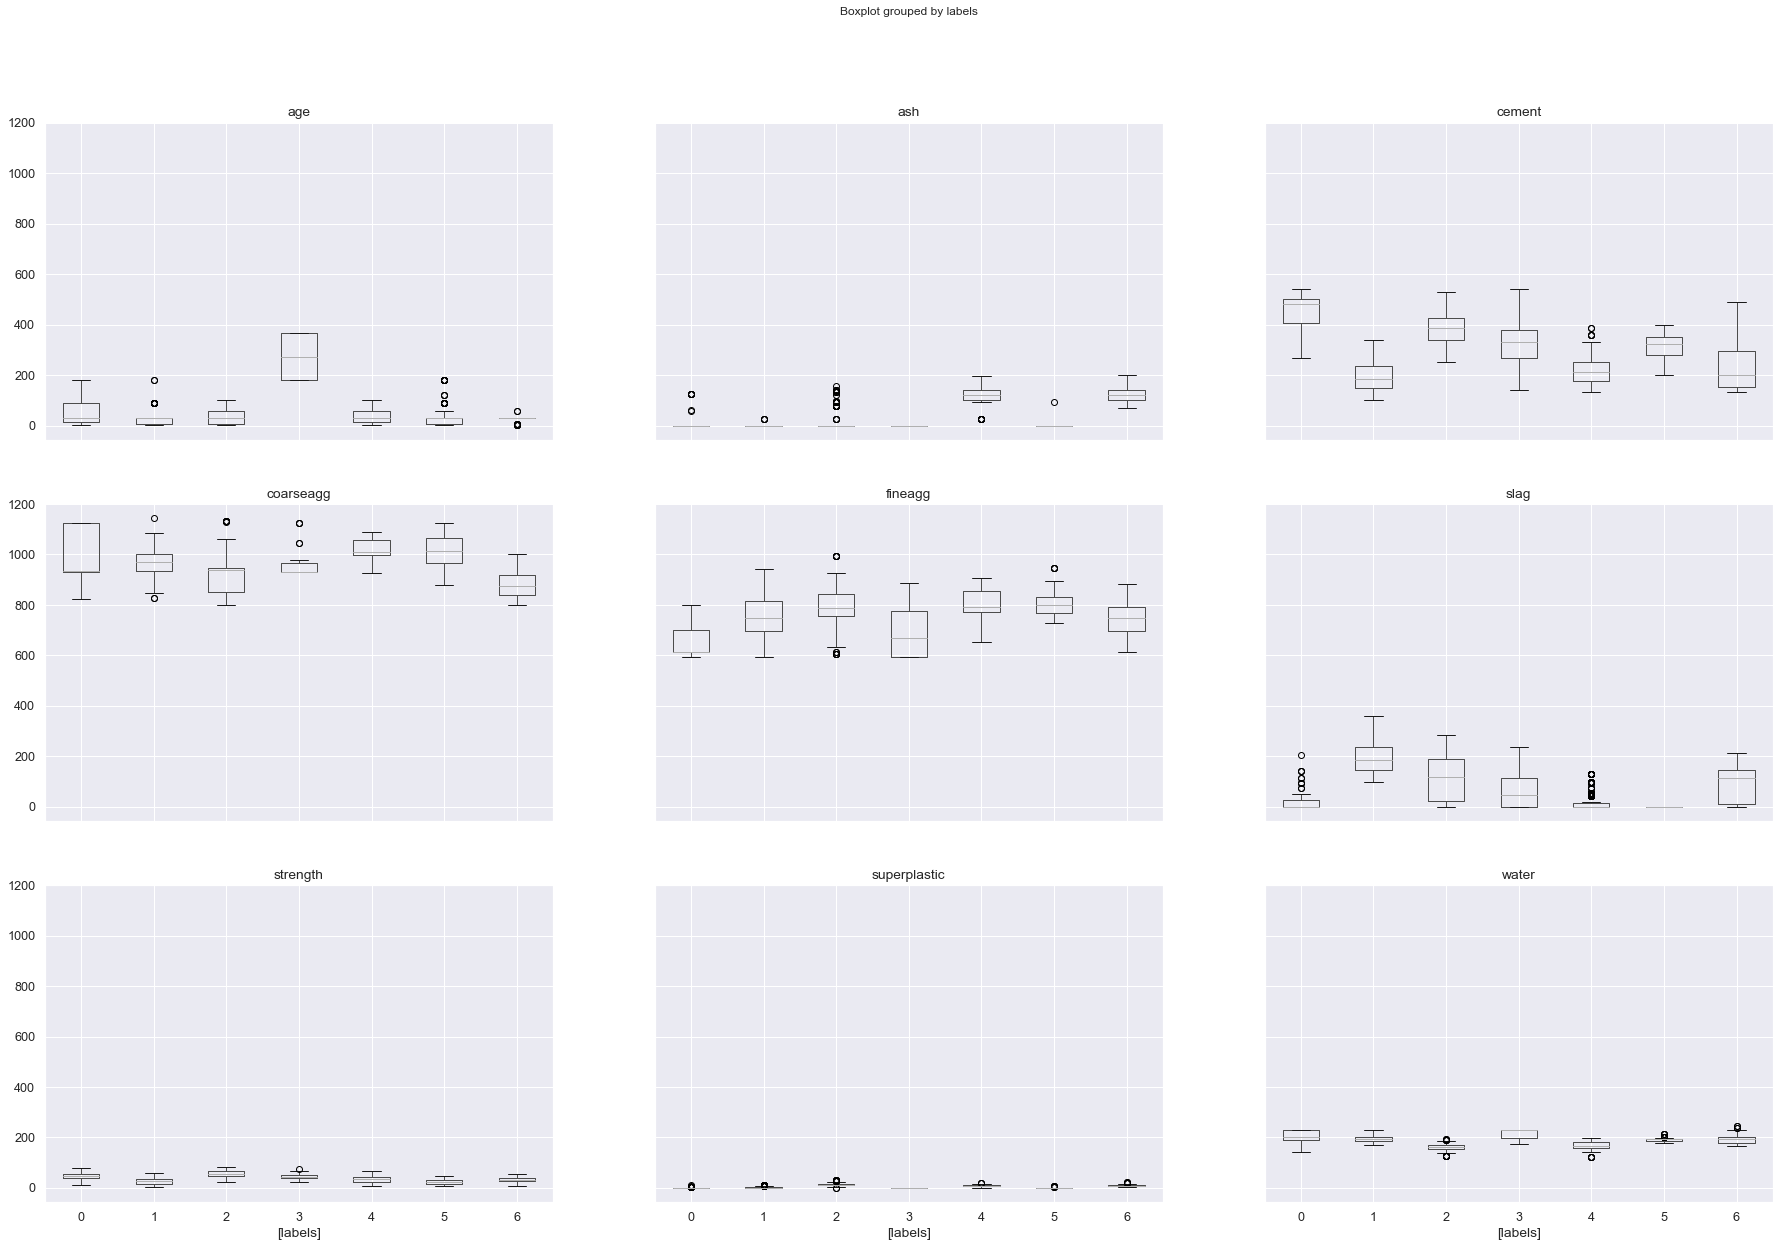

In [71]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
df_labeled = df_orig.join(cluster_labels)
df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20));

No distinct clusters are visible at any number of clusters. Looks like the attributes are weak predictors except for cement. The potential of getting better results by breaking data into clusters is unlikely to give the desired result.

### 3. Deliverable -3 (create the model )

3.a. Obtain feature importance for the individual features and present your findings
In this section we test and compare predictive performance of various ML Models using the amount of explained variance (in percentage) as an evaluation metric. ML Models used for comparison are:

Linear Regression

K-NN Regressor

SVR

Decision Tree Regressor

Adaboost Regressor

Random Forest Regressor

Bagging Regressor

Gradient Boost Regressor

In this section, we first examine the effect of step 2.a (creating composite feature, droping a feature) on the model accuracy and will decide which dataframe to use in the final analysis

We will use df_orig (our original dataframe with raw features) and df_feat (modified) dataframes for this analysis


Accuracy of models using raw features

In [72]:
df_orig.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
# Let's create train and test sets
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']

In [73]:
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Create empty dataframe to store the results
df_result_raw_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
# We will use the pipeline approach
pipelines = []
pipelines.append(('Linear Regression',Pipeline([('scaler',RobustScaler()),('LR',LinearRegression())])))
pipelines.append(('KNN Regressor',Pipeline([('scaler',RobustScaler()),('KNNR',KNeighborsRegressor())])))
pipelines.append(('SupportVectorRegressor',Pipeline([('scaler',RobustScaler()),('SVR',SVR())])))
pipelines.append(('DecisionTreeRegressor',Pipeline([('scaler',RobustScaler()),('DTR',DecisionTreeRegressor())])))
pipelines.append(('AdaboostRegressor',Pipeline([('scaler',RobustScaler()),('ABR',AdaBoostRegressor())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])))


In [76]:
# Let's find and store the cross-validation score for each pipeline for training data with raw features.
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_raw_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]

In [77]:
# Let's check the training results with raw features 
df_result_raw_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,60.137578,11.046775
1,KNN Regressor,74.371334,7.992357
2,SupportVectorRegressor,71.615268,7.026647
3,DecisionTreeRegressor,84.266741,5.294837
4,AdaboostRegressor,79.293461,4.350271
5,RandomForestRegressor,90.741636,3.311621
6,BaggingRegressor,89.199895,3.991941
7,GradientBoostRegressor,89.914083,2.818196


In [78]:
# Let's find and store the cross-validation score for each pipeline for test data with raw features.
df_result_raw_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_raw_test.loc[ind] = [name,explained_variance_score(y_test,y_pred)*100]

In [79]:
# Let's check the test results with raw features
df_result_raw_test

,Regressor,ExplVarianceScore
0,Linear Regression,60.866525
1,KNN Regressor,81.582445
2,SupportVectorRegressor,73.189812
3,DecisionTreeRegressor,87.169288
4,AdaboostRegressor,80.896430
5,RandomForestRegressor,90.695924
6,BaggingRegressor,90.898397
7,GradientBoostRegressor,89.453018


### Observation 
From the above result dataframes, it is clear that ensemble models are better choice for this problem. Without any feature engneering, we get best score using Gradient Boosting Regressor both in terms of explained variance in percentage and standard deviation. As per the expectations, linear regression performs poorly.

In [80]:
df_feat.head()

,cement,fineagg,feat_1,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,748.5,141.3,748.5,29955.60,0.00,28754.55,0.00,137315.34,105763.05,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,796.2,168.9,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,134478.18,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,861.2,250.0,861.2,0.00,23925.00,46850.00,1375.00,239225.00,215300.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,670.0,266.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,178220.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,696.7,154.8,696.7,28390.32,0.00,29922.84,1408.68,162137.52,107849.16,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [82]:
# Let's create train and test sets from modified dataframe with raw as well as new features.
X = df_feat
y = concrete_data['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Let's create dataframe to store the results.
df_result_mod_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_mod_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]
# Let's check the training results with raw features  as well as new features
df_result_mod_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,69.352338,12.748920
1,KNN Regressor,75.209326,7.368571
2,SupportVectorRegressor,1.203580,1.110968
3,DecisionTreeRegressor,84.196469,4.234191
4,AdaboostRegressor,83.622238,3.992626
5,RandomForestRegressor,90.629565,2.608762
6,BaggingRegressor,89.554581,3.141547
7,GradientBoostRegressor,91.037017,2.560851


In [83]:
# Let's find and store the cross-validation score for each pipeline for training data with raw as well as new features.
df_result_mod_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_mod_test.loc[ind] = [name,explained_variance_score(y_test,y_pred)*100]
# Let's check the test results with raw features  as well as new features
df_result_mod_test

,Regressor,ExplVarianceScore
0,Linear Regression,74.058040
1,KNN Regressor,69.115974
2,SupportVectorRegressor,-0.224730
3,DecisionTreeRegressor,79.447291
4,AdaboostRegressor,83.613556
5,RandomForestRegressor,88.742221
6,BaggingRegressor,88.197843
7,GradientBoostRegressor,90.180811


### Observation
One can see that, using the feature engineered dataframe, we do not get any significant improvement in the performance of ML models than that of obtained with raw features. Although, performance of linear regression model is increased significantly (from 62% to 72%), we use dataframe with raw features in our final stage i.e., model tuning since ensemble models which are better choice for this problem, do not show any significant improvement for selected features (118) over performance with raw features (8).

Feature importance given by the ensemble models
For this problem, the ensemble models work well. In this section we analyse the feature importance given by these models.

In [84]:
# Separate target and independent features
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creating pipelines for 3 best models.
pipe_rf = Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])
pipe_br = Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])
# Initalize the empty dataframes to capture the feature importances given by these models..
df_featImp_rf = df_featImp_br = df_featImp_gbr = pd.DataFrame({'Features':[], 'Importance':[]})

In [85]:
# feature importance given by random forest regressor
pipe_rf.fit(X_train,y_train)
featImp_rf = pipe_rf.steps[1][1].feature_importances_
df_featImp_rf['Features'] = X_train.columns
df_featImp_rf['Importance'] = featImp_rf
# Feature importance given by Random Forest Regressor
df_featImp_rf.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.334776
0,cement,0.298391
4,superplastic,0.103659
3,water,0.091834
1,slag,0.079306
6,fineagg,0.042850
5,coarseagg,0.027408
2,ash,0.021776


In [86]:
# feature importance given by Gradient Boost Regressor
pipe_gbr.fit(X_train,y_train)
featImp_gbr = pipe_gbr.steps[1][1].feature_importances_
df_featImp_gbr['Features'] = X_train.columns
df_featImp_gbr['Importance'] = featImp_gbr
# Feature importance given by Random Forest Regressor
df_featImp_gbr.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.359209
0,cement,0.303860
4,superplastic,0.105642
3,water,0.082075
1,slag,0.076526
6,fineagg,0.044437
2,ash,0.015833
5,coarseagg,0.012418


Feature importances given by random forest regressor and gradient boost regressor differ. One can see that,

age and cement attributes are the most important features to predict the concrete strength
ash attribute the weakest predictor of concrete strength

Deliverable -4 (Tuning the model)

a. Algorithms that you think will be suitable for this project

b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

c. Model performance range at 95% confidence level

4.a Algorithms that you think will be suitable for this project
Since, the target variable in this problem i.e., strength is a highly non-linear function of independent variables, any algorithm which captures this non-linear relashionship is suitable for this project. Basic models applicable for this problem can be linear regression with polynomial features of degree d with d>1, models with nonlinear kernels such as support vector regressor with nonlinear kernels such as RBF. Decision tree regression model is also suitable since it can also capture nonlinearity however more generalized model such as random forest regression would be more effective. Finally, ensemble regression models which consist of multiple models which either work parallely or sequentially to give final output such as adaboost, bagging and gradient boost regressor should be most effective

From results presented above, we can conclude that ensemble based regression models namely gradient boost regressor, bagging regressor and random forest regressor are most effective for this problem and we will tune the gradient boosting model (best performing) to squeeze the extra performance out of it.

4. b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
We will make use of GridSearchCV and RandomSearchCV functions to find the best model parameters by tuning the hyper parameters

In [87]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Separate target and independent features
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])

In [88]:
# Let's see what are the hyper parameters for gradient boosting regressor model
pipe_gbr.steps[1][1]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
param_grid=[{'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }]

In [ ]:
search = GridSearchCV(pipe_gbr, param_grid, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

### Using RandomizedSearchCV

In [ ]:
random_grid={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }
search = RandomizedSearchCV(estimator=pipe_gbr, param_distributions=random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

### Observation
Using GridSearchCV based model tuning the training and test scores (explained variance) are about 92%.